In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import wandb

from scipy.ndimage.filters import gaussian_filter1d

sb.set(style="ticks", color_codes=True, context="paper", font_scale=1.5)
sb.set_style({"xtick.direction": "in","ytick.direction": "in"})
main_path = os.path.dirname(os.getcwd())

save_plots = False
save_tables = False

In [55]:
run_id_tcn_yes = 'jorgemarpa/Phy-VAE/cfwyf4zg'
run_id_tcn_no = 'jorgemarpa/Phy-VAE/yp4qdw1r'
run_id_gru = 'jorgemarpa/Phy-VAE/b68z1hwo'

api = wandb.Api()

run_tcn_yes = api.run(run_id_tcn_yes)
df_tcn_yes = run_tcn_yes.history()

run_tcn_no = api.run(run_id_tcn_no)
df_tcn_no = run_tcn_no.history()

run_gru = api.run(run_id_gru)
df_gru = run_gru.history()

In [56]:
train_gru = df_gru.dropna(subset=['Train_Loss'])
test_gru = df_gru.dropna(subset=['Test_Loss'])

train_tcn_no = df_tcn_no.dropna(subset=['Train_Loss'])
test_tcn_no = df_tcn_no.dropna(subset=['Test_Loss'])

train_tcn_yes = df_tcn_yes.dropna(subset=['Train_Loss'])
test_tcn_yes = df_tcn_yes.dropna(subset=['Test_Loss'])

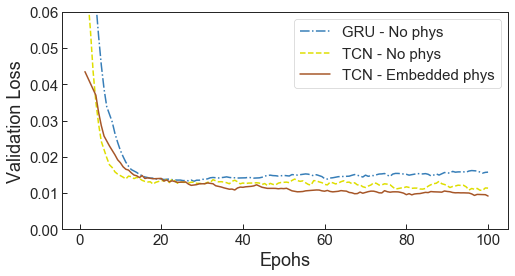

In [76]:
plt.figure(figsize=(8,4))

plt.plot(test_gru._step / 618, test_gru.Test_Loss.ewm(span=9, adjust=False).mean(), 
         c='#377eb8', ls='-.', label='GRU - No phys', lw=1.5)

plt.plot(test_tcn_no._step / 261, test_tcn_no.Test_Loss.ewm(span=5, adjust=False).mean(), 
         c='#dede00', ls='--', label='TCN - No phys', lw=1.5)

plt.plot(test_tcn_yes._step / 618, test_tcn_yes.Test_Loss.ewm(span=7, adjust=False).mean(), 
         c='#a65628', ls='-', label='TCN - Embedded phys', lw=1.5)

plt.ylim(0,0.06)
plt.ylabel('Validation Loss', fontsize=18)
plt.xlabel('Epohs', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15)

if save_plots:
    plt.savefig('%s/imgs/loss_tcn_gru.pdf' % (main_path), format='pdf', bbox_inches='tight')
plt.show()